# data preperation 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('Mobiles_info.csv')

In [33]:
df.head()

,name,ratings,number of rating,number of reviews,ram,rom,expandable,display,camera,battery,price
0,Cellecor E3,3.7,56,2,32.0,32.0,32.0,1.80,0.8,1000.0,"1,061"
1,"REDMI 10 (Caribbean Green, 64 GB)",4.3,"2,22,897","13,810",4.0,64.0,1.0,6.70,50.0,6000.0,"9,499"
2,"REDMI 10 (Midnight Black, 64 GB)",4.3,"2,22,897","13,810",4.0,64.0,1.0,6.70,50.0,6000.0,"9,499"
3,"MOTOROLA G32 (Satin Silver, 128 GB)",4.1,"9,683",799,8.0,128.0,NaN,6.55,50.0,5000.0,"11,999"
4,"realme C33 2023 (Night Sea, 64 GB)",4.5,"6,542",184,4.0,64.0,1.0,6.50,50.0,5000.0,"9,999"


In [34]:
df['price'] = df['price'].str.replace(',','')

In [35]:
df['price'] = df['price'].fillna(0)

In [36]:
df['price'] = df['price'].astype('int32')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               586 non-null    object 
 1   ratings            580 non-null    float64
 2   number of rating   580 non-null    object 
 3   number of reviews  580 non-null    object 
 4   ram                582 non-null    float64
 5   rom                559 non-null    float64
 6   expandable         331 non-null    float64
 7   display            585 non-null    float64
 8   camera             586 non-null    float64
 9   battery            565 non-null    float64
 10  price              586 non-null    int32  
dtypes: float64(7), int32(1), object(3)
memory usage: 48.2+ KB


In [38]:
mean = df['price'].mean()

In [43]:
df['price'] = df['price'].replace(0,mean)

In [44]:
df['number of reviews'] =df['number of reviews'].str.replace(',','')
df['number of rating'] = df['number of rating'].str.replace(',','')

In [45]:
df['number of reviews'] = df['number of reviews'].fillna(0)
df['number of rating'] = df['number of rating'].fillna(0)

In [46]:
df['number of reviews'] = df['number of reviews'].astype('int32')
df['number of rating'] = df['number of rating'].astype('int32')

In [47]:
mean_ra = df['number of rating'].mean()
mean_re = df['number of reviews'].mean()

In [48]:
df['number of reviews'] = df['number of reviews'].replace(0,mean_ra)
df['number of rating'] = df['number of rating'].replace(0,mean_re)

In [49]:
df.isnull().sum()

name                   0
ratings                6
number of rating       0
number of reviews      0
ram                    4
rom                   27
expandable           255
display                1
camera                 0
battery               21
price                  0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               586 non-null    object 
 1   ratings            580 non-null    float64
 2   number of rating   586 non-null    float64
 3   number of reviews  586 non-null    float64
 4   ram                582 non-null    float64
 5   rom                559 non-null    float64
 6   expandable         331 non-null    float64
 7   display            585 non-null    float64
 8   camera             586 non-null    float64
 9   battery            565 non-null    float64
 10  price              586 non-null    float64
dtypes: float64(10), object(1)
memory usage: 50.5+ KB


In [51]:
df.to_csv('updated_mobile_info.csv')

# Normalization

In [52]:
df=pd.read_csv('updated_mobile_info.csv')

In [53]:
df.head()

,Unnamed: 0,name,ratings,number of rating,number of reviews,ram,rom,expandable,display,camera,battery,price
0,0,Cellecor E3,3.7,56.0,2.0,32.0,32.0,32.0,1.80,0.8,1000.0,1061.0
1,1,"REDMI 10 (Caribbean Green, 64 GB)",4.3,222897.0,13810.0,4.0,64.0,1.0,6.70,50.0,6000.0,9499.0
2,2,"REDMI 10 (Midnight Black, 64 GB)",4.3,222897.0,13810.0,4.0,64.0,1.0,6.70,50.0,6000.0,9499.0
3,3,"MOTOROLA G32 (Satin Silver, 128 GB)",4.1,9683.0,799.0,8.0,128.0,NaN,6.55,50.0,5000.0,11999.0
4,4,"realme C33 2023 (Night Sea, 64 GB)",4.5,6542.0,184.0,4.0,64.0,1.0,6.50,50.0,5000.0,9999.0


<AxesSubplot: xlabel='price', ylabel='Density'>

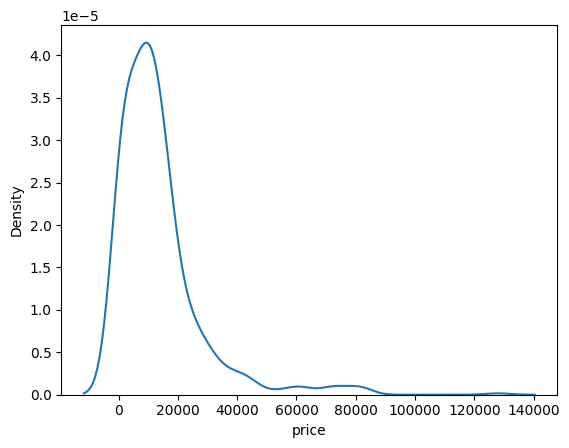

In [54]:
sns.kdeplot(df['price'])

In [55]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['name','price']),
                                                df['price'],
                                                test_size=0.2,
                                                random_state=1)

In [60]:
x_train.shape ,x_test.shape

((468, 10), (118, 10))

In [61]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(x_train)

MinMaxScaler()

In [62]:
x_train_scalar = scalar.transform(x_train)
x_test_scalar = scalar.transform(x_test)

In [63]:
x_train_scalar

array([[7.63698630e-01, 7.89473684e-01, 5.15780784e-03, ...,
        3.15299989e-02, 4.33333333e-03, 6.71666667e-01],
       [6.62671233e-01, 6.84210526e-01, 8.60024940e-03, ...,
        9.86730180e-03, 1.00000000e-04, 2.83333333e-01],
       [7.50000000e-01, 7.89473684e-01, 3.40093321e-01, ...,
        3.49325167e-02, 4.33333333e-03, 1.00000000e+00],
       ...,
       [1.21575342e-01, 6.84210526e-01, 4.30656464e-02, ...,
        3.34013837e-02, 3.60000000e-02, 8.33333333e-01],
       [4.00684932e-01, 7.89473684e-01, 2.10995908e-02, ...,
        3.42520132e-02, 1.66666667e-02, 7.50000000e-01],
       [6.16438356e-02, 7.36842105e-01, 2.61666540e-02, ...,
        3.43087218e-02, 1.66666667e-02, 8.33333333e-01]])

# Standardization

In [67]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(x_train)

StandardScaler()

In [68]:
x_train_std = scalar.transform(x_train)
x_test_std = scalar.transform(x_test)

In [69]:
x_train_std

array([[ 0.93973568,  0.47612375, -0.45935445, ...,  0.05434196,
        -0.27541793, -0.01918932],
       [ 0.58444935, -0.26827277, -0.43590919, ..., -0.41349195,
        -0.32118086, -1.37397985],
       [ 0.89156126,  0.47612375,  1.8217736 , ...,  0.12782373,
        -0.27541793,  1.12627736],
       ...,
       [-1.31844012, -0.26827277, -0.20117749, ...,  0.09475694,
         0.06690323,  0.54482219],
       [-0.33688637,  0.47612375, -0.35078057, ...,  0.11312738,
        -0.14209285,  0.25409461],
       [-1.5292032 ,  0.10392549, -0.31627059, ...,  0.11435207,
        -0.14209285,  0.54482219]])

In [70]:
x_train_scalar

array([[7.63698630e-01, 7.89473684e-01, 5.15780784e-03, ...,
        3.15299989e-02, 4.33333333e-03, 6.71666667e-01],
       [6.62671233e-01, 6.84210526e-01, 8.60024940e-03, ...,
        9.86730180e-03, 1.00000000e-04, 2.83333333e-01],
       [7.50000000e-01, 7.89473684e-01, 3.40093321e-01, ...,
        3.49325167e-02, 4.33333333e-03, 1.00000000e+00],
       ...,
       [1.21575342e-01, 6.84210526e-01, 4.30656464e-02, ...,
        3.34013837e-02, 3.60000000e-02, 8.33333333e-01],
       [4.00684932e-01, 7.89473684e-01, 2.10995908e-02, ...,
        3.42520132e-02, 1.66666667e-02, 7.50000000e-01],
       [6.16438356e-02, 7.36842105e-01, 2.61666540e-02, ...,
        3.43087218e-02, 1.66666667e-02, 8.33333333e-01]])

Observe here that standardization is used when data have Gaussian distribution (normal distribution)
             and normalization is used when data dont have Gaussian distribution